In [186]:
import pandas as pd
import numpy as np

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [189]:
sns.set(rc={'figure.figsize': (10, 6)})

In [190]:
titanic_data = pd.read_csv('titanic/train.csv')

In [191]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [193]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [194]:
X = pd.get_dummies(X)

In [195]:
X = X.fillna({'Age': X.Age.median()})

In [196]:
clf = DecisionTreeClassifier(criterion='entropy')

In [197]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [199]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [200]:
clf.score(X_test, y_test)

0.7661016949152543

In [201]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [202]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [203]:
clf.score(X_test, y_test)

0.8067796610169492

In [204]:
max_depth_values = range(1, 100)

In [205]:
scores = pd.DataFrame()

In [206]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores = pd.concat([
        scores,
        pd.DataFrame({
            'max_depth': [max_depth],
            'train_score': [train_score],
            'test_score': [test_score],
            'cross_val_score': [mean_cross_val_score]
        }),
    ], ignore_index=True)

In [207]:
scores.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.788627
4,5,0.840604,0.810169,0.800392


In [208]:
scores_data_long = pd.melt(scores,
        id_vars=['max_depth'],
        value_vars=['train_score', 'test_score', 'cross_val_score'],
        var_name='set_type',
        value_name='score'
        )

In [209]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

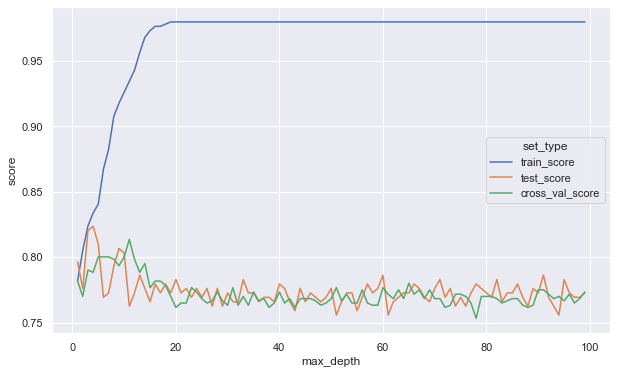

In [210]:
sns.lineplot(data=scores_data_long, x='max_depth', y='score', hue='set_type')

In [211]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.800350


In [212]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [213]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

In [214]:
clf = DecisionTreeClassifier()

In [215]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 30)
}

In [216]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [217]:
grid_search_cv_clf.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [218]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [219]:
best_clf = grid_search_cv_clf.best_estimator_

In [220]:
best_clf.score(X_test, y_test)

0.8915254237288136

In [221]:
y_true = y_test

In [222]:
y_pred = best_clf.predict(X_test)

In [223]:
precision_score(y_true, y_pred)

0.8492063492063492

In [224]:
recall_score(y_true, y_pred)

0.8916666666666667

In [225]:
f1_score(y_true, y_pred)

0.8699186991869918

In [226]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [227]:
y_predicted_prob

array([[0.        , 1.        ],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.94736842, 0.05263158],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [0.28571429, 0.71428571],
       [0.875     , 0.125     ],
       [1.        , 0.        ],
       [0.94736842, 0.05263158],
       [0.57142857, 0.42857143],
       [0.91666667, 0.08333333],
       [0.94736842, 0.05263158],
       [1.        , 0.        ],
       [1.

<AxesSubplot:>

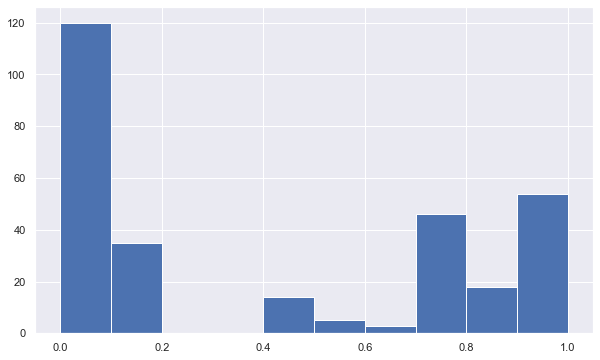

In [228]:
pd.Series(y_predicted_prob[:,1]).hist()

In [229]:
y_pred = np.where(y_predicted_prob[:,1] > 0.2, 1, 0)

In [230]:
precision_score(y_true, y_pred)

0.8071428571428572

In [231]:
recall_score(y_true, y_pred)

0.9416666666666667

In [232]:
f1_score(y_true, y_pred)

0.8692307692307693

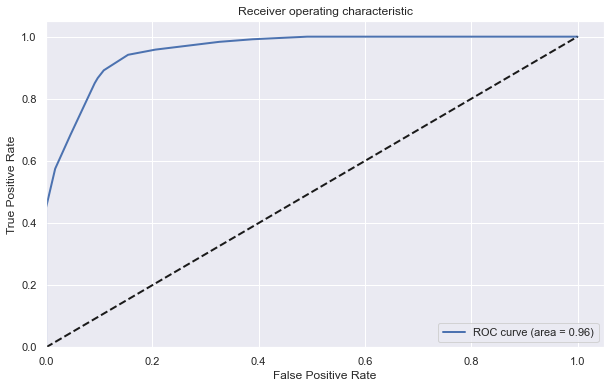

In [233]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc), lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')

In [234]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [235]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

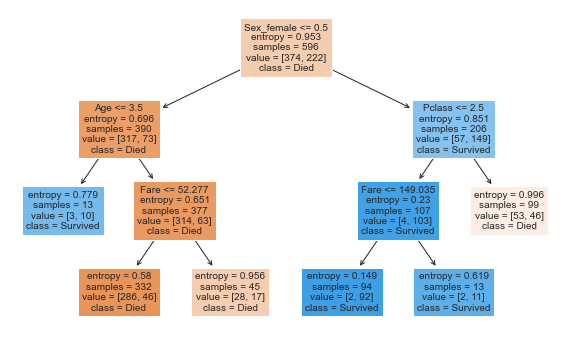

In [236]:
plot_tree(clf, feature_names=list(X_train), class_names=['Died', 'Survived'], filled=True, fontsize=10)
pass

In [240]:
clf_rf = RandomForestClassifier()

In [241]:
parameters = {
    'n_estimators': range(10, 31, 10),
    'max_depth': [2, 5, 7, 10]
}

In [243]:
grid_search_cv_clf_rf = GridSearchCV(clf_rf, parameters, cv=5)

In [244]:
grid_search_cv_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': range(10, 31, 10)})

In [245]:
grid_search_cv_clf_rf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [247]:
best_clf = grid_search_cv_clf_rf.best_estimator_

In [248]:
best_clf.score(X_test, y_test)

0.8101694915254237

In [252]:
feature_importances = best_clf.feature_importances_

In [275]:
feature_importances_df = pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances,
}).sort_values('feature_importances', ascending=False)

<AxesSubplot:xlabel='feature_importances', ylabel='features'>

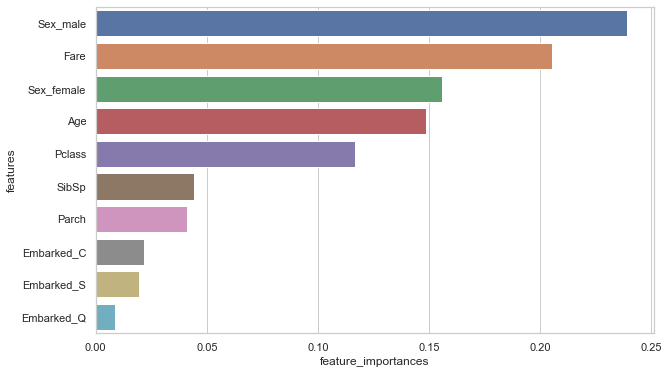

In [279]:
sns.barplot(
    data=feature_importances_df,
    y='features',
    x='feature_importances'
)